### Train Polynomial Regression Model
- work with more complex data which does not fit to a straight line
- src: https://security.kiwi/docs/training-regression-models/

import packages

In [1]:
import operator
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Load data

In [3]:
boston = load_boston()
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Assign data to x, y axis

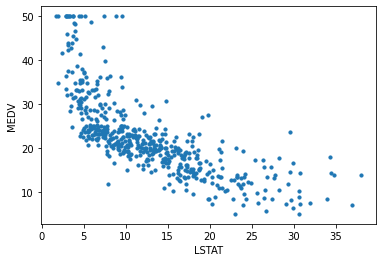

In [5]:
x = data['LSTAT']
y = boston.target

# visualization
plt.scatter(x,y,s=10)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

Create polynomial features

In [6]:
poly = PolynomialFeatures(degree=2, include_bias=False)
# Tranform and fit the x axis. Reshape transforms the data to the correct size for the operation.
x_poly = poly.fit_transform(x.values.reshape(-1,1))

Make predictions

In [7]:
pr = LinearRegression()
pr.fit(x_poly, y)
y_pred = pr.predict(x_poly)

Visualize results

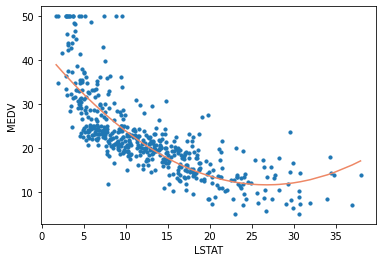

In [8]:
plt.scatter(x,y,s=10)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

sort_axis = operator.itemgetter(0)
sort = sorted(zip(x,y_pred), key=sort_axis)
x, y_pred = zip(*sort)

plt.plot(x,y_pred,color='#ee8866')
plt.show()
